# Statistics

### Imports

In [78]:
import pandas as pd # Excel+, tables and more
import numpy as np # Maths
import matplotlib.pyplot as plt # Setting up figures, axis labels, etc
import seaborn as sns # Scatterplots and stripplots and histograms, oh my
from scipy import stats # T tests, mann whitney u, ordinary least squares linear regression
import sys # for difficulties installing packages
!{sys.executable} -m pip install statsmodels
import statsmodels.api as sm # robust lineear regression
import statsmodels.formula.api as smf # mixed effect models
import sklearn # multilayer perceptrons, support vector machines, random forests

from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.stats.anova import AnovaRM

rng = np.random.default_rng(569463869346329586) # random number generator for reproducibility

## Demos and Slides

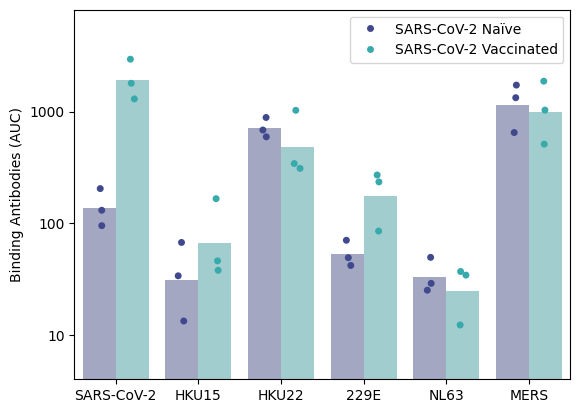

In [29]:
binding = pd.DataFrame({'index': np.arange(36)})
binding['Timepoint'] = np.tile(np.repeat(np.array(['Pre', 'Post']), 3), 6)
binding['Virus'] = np.repeat(['SARS-CoV-2', 'HKU15', 'HKU22', '229E', 'NL63', 'MERS'], 6)
binding['Antibodies'] = rng.normal(0, 1, 36) + 6
binding.loc[(binding['Virus'] == 'SARS-CoV-2') & (binding['Timepoint'] == 'Post'), 'Antibodies'] += 5
for virus in ['HKU15', 'HKU22', '229E', 'NL63', 'MERS']:
    binding.loc[(binding['Virus'] == virus), 'Antibodies'] += rng.choice([-1, 0, 1, 2, 3, 4])

sns.stripplot(data=binding, x='Virus', y='Antibodies', hue='Timepoint', jitter=True, dodge=True, palette='mako')
sns.barplot(data=binding, x='Virus', y='Antibodies', hue='Timepoint', errorbar=None, estimator=np.mean, alpha=0.5, palette='mako', legend=False)
yticks = np.log2([10, 100, 1000])
yticklabels = [10, 100, 1000]
plt.yticks(yticks, yticklabels)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['SARS-CoV-2 Naïve', 'SARS-CoV-2 Vaccinated'])
plt.xlabel('')
plt.ylabel('Binding Antibodies (AUC)')
plt.ylim(2, 13)
plt.show()

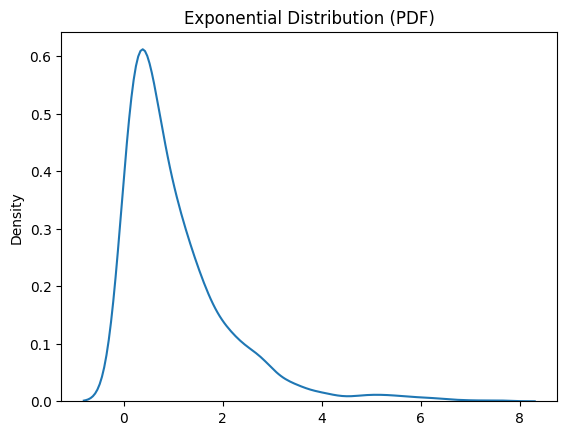

In [36]:
vals = rng.standard_exponential(size=1000)
sns.kdeplot(vals)
plt.title('Exponential Distribution (PDF)')
plt.show()

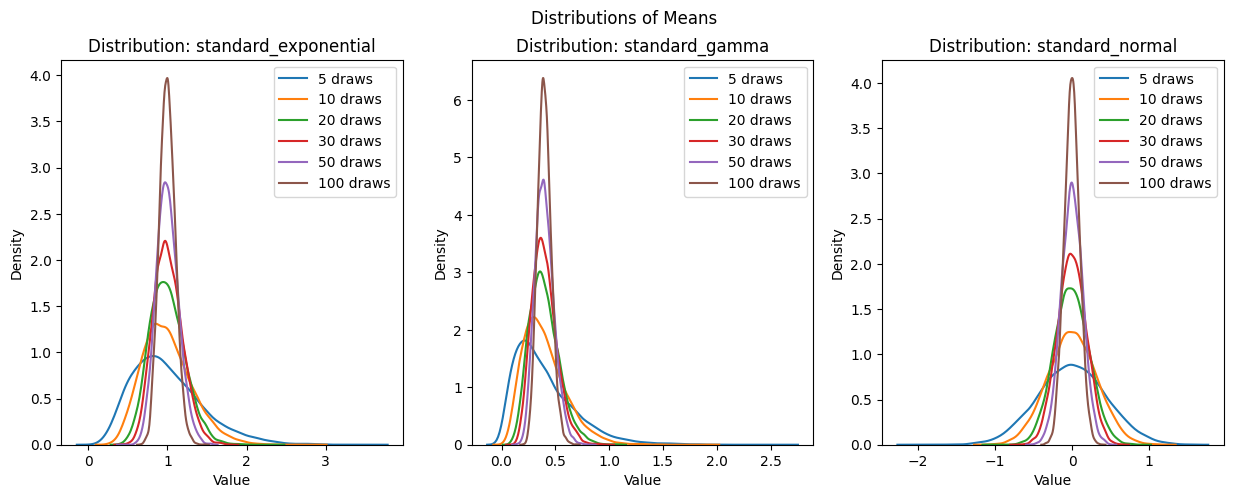

In [59]:
draws = [5, 10, 20, 30, 50, 100]
distributions = [rng.standard_exponential, lambda val: rng.standard_gamma(0.4, size=val), rng.standard_normal]
distribution_names = [rng.standard_exponential.__name__, rng.standard_gamma.__name__, rng.standard_normal.__name__]
fig, axes = plt.subplots(1, len(distributions), figsize=(15, 5))
for i in range(len(distributions)):
    dist = distributions[i]
    dist_name = distribution_names[i]
    ax = axes[i]
    plt.sca(ax)
    for draw in draws:
        vals = []
        for _ in range(10000):
            vals.append(dist(draw).mean())
        sns.kdeplot(vals, label=f'{draw} draws')
    plt.title(f'Distribution: {dist_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
plt.suptitle('Distributions of Means')
plt.show()


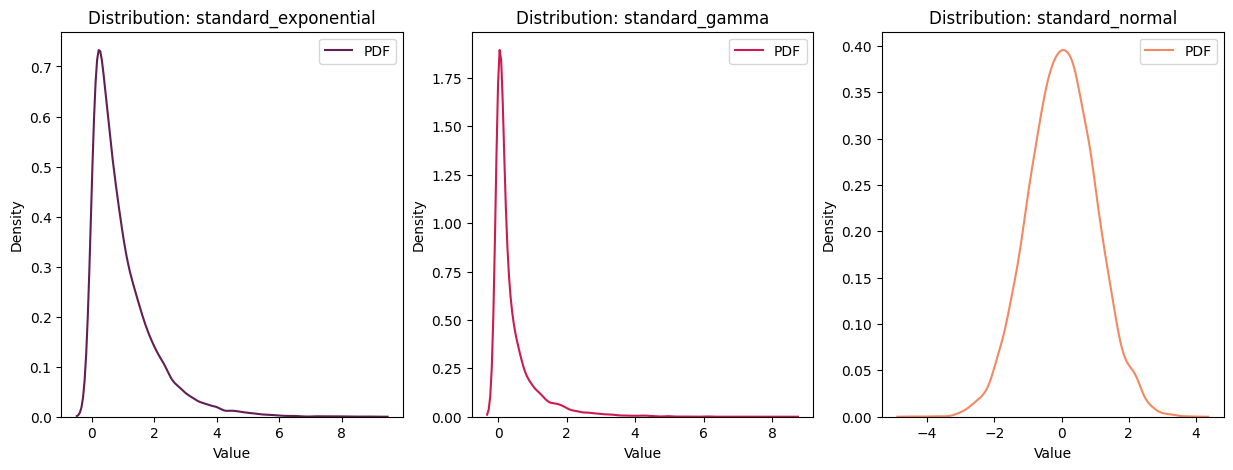

In [57]:
draws = [5, 10, 20, 30, 50, 100]
distributions = [rng.standard_exponential, lambda val: rng.standard_gamma(0.4, size=val), rng.standard_normal]
distribution_names = [rng.standard_exponential.__name__, rng.standard_gamma.__name__, rng.standard_normal.__name__]
fig, axes = plt.subplots(1, len(distributions), figsize=(15, 5))
for i in range(len(distributions)):
    dist = distributions[i]
    dist_name = distribution_names[i]
    ax = axes[i]
    plt.sca(ax)
    vals = dist(10000)
    sns.kdeplot(vals, label=f'PDF', color=sns.color_palette('rocket', n_colors=3)[i])
    plt.title(f'Distribution: {dist_name}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
plt.show()


## Reference

Uncomment any of the functions below to get their help values

In [81]:
# 2 groups, 1 quantitative variable
# stats.ttest_ind?
# stats.ttest_rel?
# stats.mannwhitneyu?
# stats.wilcoxon?

# 2 groupe, 2 quantitative variables
# stats.linregress?
# stats.pearsonr?
# stats.spearmanr?
# sm.OLS?
# sm.RLM?

# > 2 groups, one quantitative variable
# stats.f_oneway?
# AnovaRM?

# More complex models
# smf.mixedlm?
# sm.gam.GLMGam?

In [84]:
# High level interfaces

# sns.relplot? # scatterplot, lineplot, etc
# sns.catplot? # stripplot, boxplot, barplot, etc
# sns.lmplot? # regression plots
# sns.displot? # histogram, kdeplot, etc

# Single plot interfaces. You can run these on top of each other, so it's easy to put a stripplot on top of a barplot

# sns.scatterplot?
# sns.lineplot?

# sns.stripplot?
# sns.boxplot?

# sns.regplot?

# sns.histplot?
# sns.kdeplot?

## Big questions

Antibody Data
- Does the vaccine increase SARS-CoV-2 antibodies in people with pre-existing immunity?
- Do antibodies decrease after vaccination? How fast?"
- What about after vaccine dose 3?
- Do male Moderna recipients benefit from a third dose of the vaccine?
- Is there any difference in peak antibody responses after vaccination based on race?
- Does age have an impact on antibody titers, either after pre-vaccine infection or after vaccination?

Genetic data
- Does `TIMM9` expression vary among cell lines?
- If you could only use measurements from 1 gene to identify the type of a cell line, which one would you pick?
- What if you had two?
- Which looks like a better housekeeping gene: `ACTB` or `GAPDH`
